In [12]:
import re

In [13]:
def find_wrong_indices(file_path):
    with open(file_path, 'r') as file:
        log_content = file.read()
    matches = re.findall(r'index: (\d+)[\s|\n|\|]+\|\sWrong!', log_content, re.DOTALL)
    wrong_indices = [int(match) for match in matches]
    return wrong_indices

file_path = '/home/yl3427/cylab/selfCorrectionAgent/result_mixtral.log'
# '/home/yl3427/cylab/selfCorrectionAgent/result_mixtral.log'
# '/home/yl3427/cylab/selfCorrectionAgent/result_llama3.log'

wrong_indices = find_wrong_indices(file_path)

print("Indices with 'Wrong!':", wrong_indices)


Indices with 'Wrong!': [2, 4, 5, 7, 9, 21, 23, 31, 34, 35, 49, 53, 54, 56, 58, 59, 60, 61, 62, 64, 66, 73, 76, 81, 84, 85, 86, 87, 92, 95, 97, 105, 106, 113, 117, 120, 121, 123, 130, 134, 139, 142, 157, 159, 166, 179, 181, 197, 203, 209, 212, 220, 228, 229, 230, 250, 276, 280, 289, 293, 321, 329, 330, 334, 335, 338, 341, 345, 350, 351, 354, 356, 358, 370, 375, 376, 377, 378, 380, 391, 392, 396, 397, 398, 401, 402, 407, 411, 412, 413, 414, 415, 418, 420, 421, 423, 425, 427, 428, 430, 432, 435, 436, 439, 440, 442, 444, 449, 451, 455, 456, 461, 463, 464, 465, 467, 468, 469, 472, 473, 474, 475, 478, 479, 481, 484, 486, 488, 489, 490, 495, 496, 498, 2, 4, 5, 17, 19, 20, 21, 25, 31, 34, 52, 58, 59, 60, 61, 62, 65, 66, 73, 74, 85, 92, 93, 95, 105, 106, 113, 117, 120, 121, 130, 179, 203, 212, 230, 329, 330, 334, 338, 344, 350, 356, 358, 361, 373, 374, 375, 376, 377, 391, 411, 420, 422, 433, 442, 444, 449, 451, 454, 456, 462, 463, 465, 467, 468, 469, 472, 473, 478, 479, 480, 481, 482, 484, 486,

In [14]:
len(wrong_indices)

273

In [15]:
indices = []
for i in range(len(wrong_indices)-1):
    if wrong_indices[i] > wrong_indices[i+1]:
        print(i)
        print(wrong_indices[i: i+2])
        indices.append(i)


132
[498, 2]
211
[496, 2]


In [16]:
idx1 = indices[0]+1
idx2 = indices[1]+1
base = set(wrong_indices[:idx1])
always = set(wrong_indices[idx1:idx2])
condition = set(wrong_indices[idx2:])

In [17]:
len(base)

133

In [18]:
len(base & always), base & always # 49

(61,
 {2,
  4,
  5,
  21,
  31,
  34,
  58,
  59,
  60,
  61,
  62,
  66,
  73,
  85,
  92,
  95,
  105,
  106,
  113,
  117,
  120,
  121,
  130,
  179,
  203,
  212,
  230,
  329,
  330,
  334,
  338,
  350,
  356,
  358,
  375,
  376,
  377,
  391,
  411,
  420,
  442,
  444,
  449,
  451,
  456,
  463,
  465,
  467,
  468,
  469,
  472,
  473,
  478,
  479,
  481,
  484,
  486,
  488,
  489,
  495,
  496})

In [19]:
len(base - always), base - always 

(72,
 {7,
  9,
  23,
  35,
  49,
  53,
  54,
  56,
  64,
  76,
  81,
  84,
  86,
  87,
  97,
  123,
  134,
  139,
  142,
  157,
  159,
  166,
  181,
  197,
  209,
  220,
  228,
  229,
  250,
  276,
  280,
  289,
  293,
  321,
  335,
  341,
  345,
  351,
  354,
  370,
  378,
  380,
  392,
  396,
  397,
  398,
  401,
  402,
  407,
  412,
  413,
  414,
  415,
  418,
  421,
  423,
  425,
  427,
  428,
  430,
  432,
  435,
  436,
  439,
  440,
  455,
  461,
  464,
  474,
  475,
  490,
  498})

In [20]:
len(always - base),always - base # 15

(18,
 {17,
  19,
  20,
  25,
  52,
  65,
  74,
  93,
  344,
  361,
  373,
  374,
  422,
  433,
  454,
  462,
  480,
  482})

In [21]:
import pandas as pd

brca_report = pd.read_csv("/secure/shared_data/rag_tnm_results/summary/5_folds_summary/brca_df.csv")
sample_reports = brca_report.iloc[:500, :]

sample_reports

,Unnamed: 0,patient_filename,t,text,type,n
0,46,TCGA-3C-AALI.84E6A935-1A49-4BC1-9669-3DEA161CF6FC,1,Path No.: Date Obtained: (Age: ). Date Receive...,BRCA,1
1,47,TCGA-3C-AALJ.265E5A9A-64FD-4B86-89BC-5E89F253C118,1,Path No.: Date Obtained: (Age: ). Date Receive...,BRCA,1
2,48,TCGA-3C-AALK.F43B01E6-E1DB-44B1-8003-93870606346A,0,Path No.: Date Obtained: (Age: ). Date Receive...,BRCA,-1
3,127,TCGA-4H-AAAK.8894688F-7167-48A1-BB1B-FC219B7675C2,1,Procedure: Left radical mastectomy. Preoperati...,BRCA,2
4,245,TCGA-5L-AAT0.F9B6971F-23C0-465F-BFEC-778BF228A1AE,1,Gender: Female. Color: White. Origin: Nature o...,BRCA,0
...,...,...,...,...,...,...
495,940,TCGA-B6-A0WX.EE5BB205-D59B-4FEF-8D8F-D5720EDEB075,2,Pat. Surgical Pathoro. 1. CLINICAL HISTORY : L...,BRCA,1
496,941,TCGA-B6-A0WY.C0E92852-4146-468C-9713-2DE9C3316B9F,2,surgical Pathology;. CLINICAL HISTORY: Breast ...,BRCA,1
497,942,TCGA-B6-A0WZ.B5B7CCDD-1ED2-437A-BDF0-684AF474A8A6,1,urgical Pathology. CLINICAL HISTORY: Right bre...,BRCA,1
498,943,TCGA-B6-A0X1.D792031E-2CCE-4341-B3B3-C7D1D84F8F6B,1,furgical Path. CLINICAL HISTORY: Large primary...,BRCA,1


In [24]:
for i in sorted(always - base):
    print(f"T{sample_reports.iloc[i].t+1}")

T1
T2
T2
T2
T2
T2
T2
T2
T2
T2
T2
T2
T1
T1
T3
T2
T2
T2


In [5]:
def find_similarity(file_path):
    with open(file_path, 'r') as file:
        log_content = file.read()
    matches = re.findall(r'similarity: (\d+)', log_content, re.DOTALL)
    scores = [int(match) for match in matches]
    return scores

file_path = '/home/yl3427/cylab/selfCorrectionAgent/result_llama3.log'

# '/home/yl3427/cylab/selfCorrectionAgent/result_mixtral.log'
# '/home/yl3427/cylab/selfCorrectionAgent/result_llama3.log'

similarity_scores = find_similarity(file_path)

print(similarity_scores)


[0, 85, 51, 82, 95, 93, 94, 94, 94, 92, 97, 97, 95, 94, 98, 85, 98, 84, 97, 98, 97, 97, 98, 97, 96, 100, 100, 100, 97, 97, 99, 99, 99, 99, 99, 100, 99, 98, 99, 100, 100, 98, 100, 98, 100, 100, 98, 100, 93, 99, 99, 99, 99, 99, 100, 99, 99, 100, 97, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 98, 100, 100, 100, 98, 100, 100, 100, 98, 100, 100, 100, 100, 100, 98, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 84, 99, 99, 100, 100, 100, 100, 100, 100, 99, 99, 100, 100, 100, 100, 100, 100, 98, 100, 98, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 98, 98, 98, 98, 100, 100, 100, 100, 100, 28, 94, 96, 97, 97, 96, 98, 96, 98, 97, 98, 97,

In [53]:
len(similarity_scores)

500

/tmp/ipykernel_1205895/1139927438.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


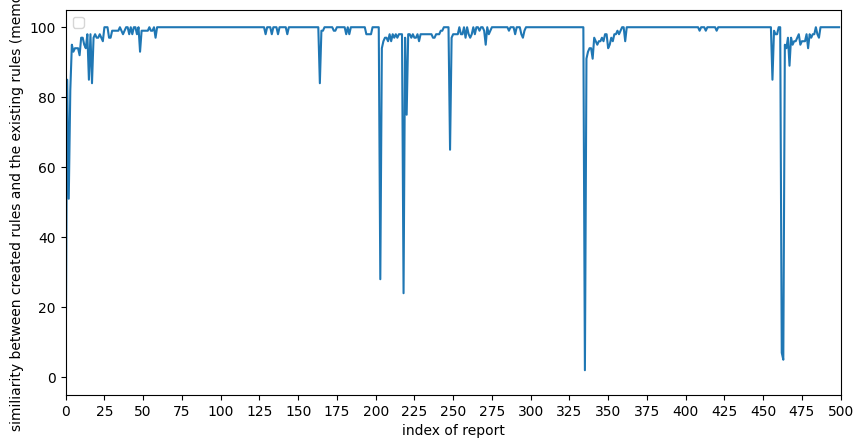

In [10]:
import matplotlib.pyplot as plt
import numpy as np

index = range(0, 500)


# Plotting
plt.figure(figsize=(10, 5))
plt.plot(index, similarity_scores)
plt.xlabel('index of report')
plt.ylabel('similiarity between created rules and the existing rules (memory)')
plt.xlim(0, 500)
plt.xticks(np.arange(0, 501, 25))  # Adjust the interval as needed
plt.legend()
plt.show()


/tmp/ipykernel_1205895/1679797493.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


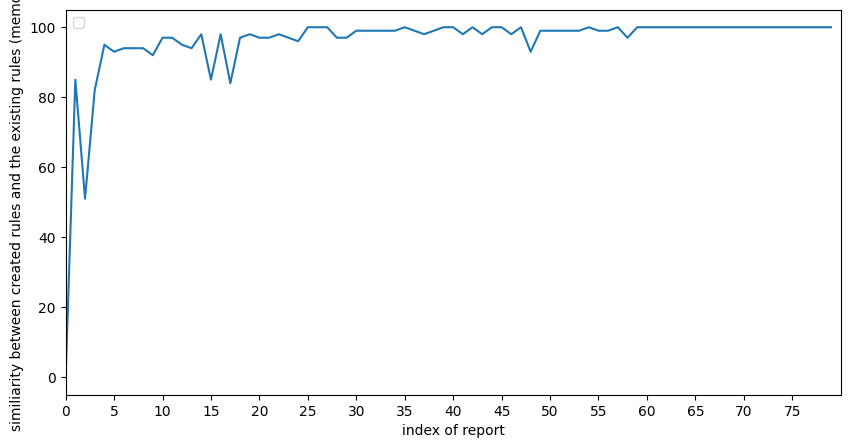

In [12]:
import matplotlib.pyplot as plt
import numpy as np

index = range(0, 80)


# Plotting
plt.figure(figsize=(10, 5))
plt.plot(index, similarity_scores[:80])
plt.xlabel('index of report')
plt.ylabel('similiarity between created rules and the existing rules (memory)')
plt.xlim(0, 80)
plt.xticks(np.arange(0, 80, 5))  # Adjust the interval as needed
plt.legend()
plt.show()
